In [4]:
%load_ext autoreload
%autoreload 2

import pygmt
from gprm.datasets import Reconstructions
from gprm.utils.raster import to_anchor_plate
from gprm.datasets import Paleogeography


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Load the Scotese rotation model and raster series from remote repositories
ScoteseModel = Reconstructions.fetch_Scotese() 

# NB here the resolution can either be '06m' or '01d'
raster_list = Paleogeography.fetch_Paleomap(resolution='06m')

# generally the input grids will have been created with anchor plate = 0, and you want to transform
# them into a different plateid frame (could be another reference frame, or fixing an actual plate)
raster_original_plate_id = 0

# For this example we rotate raster to fixed South America coo
plate_id_to_rotate_to = 201

reconstruction_time = 170.


grdimage [WARNING]: Guessing of registration in conflict between x and y, using gridline


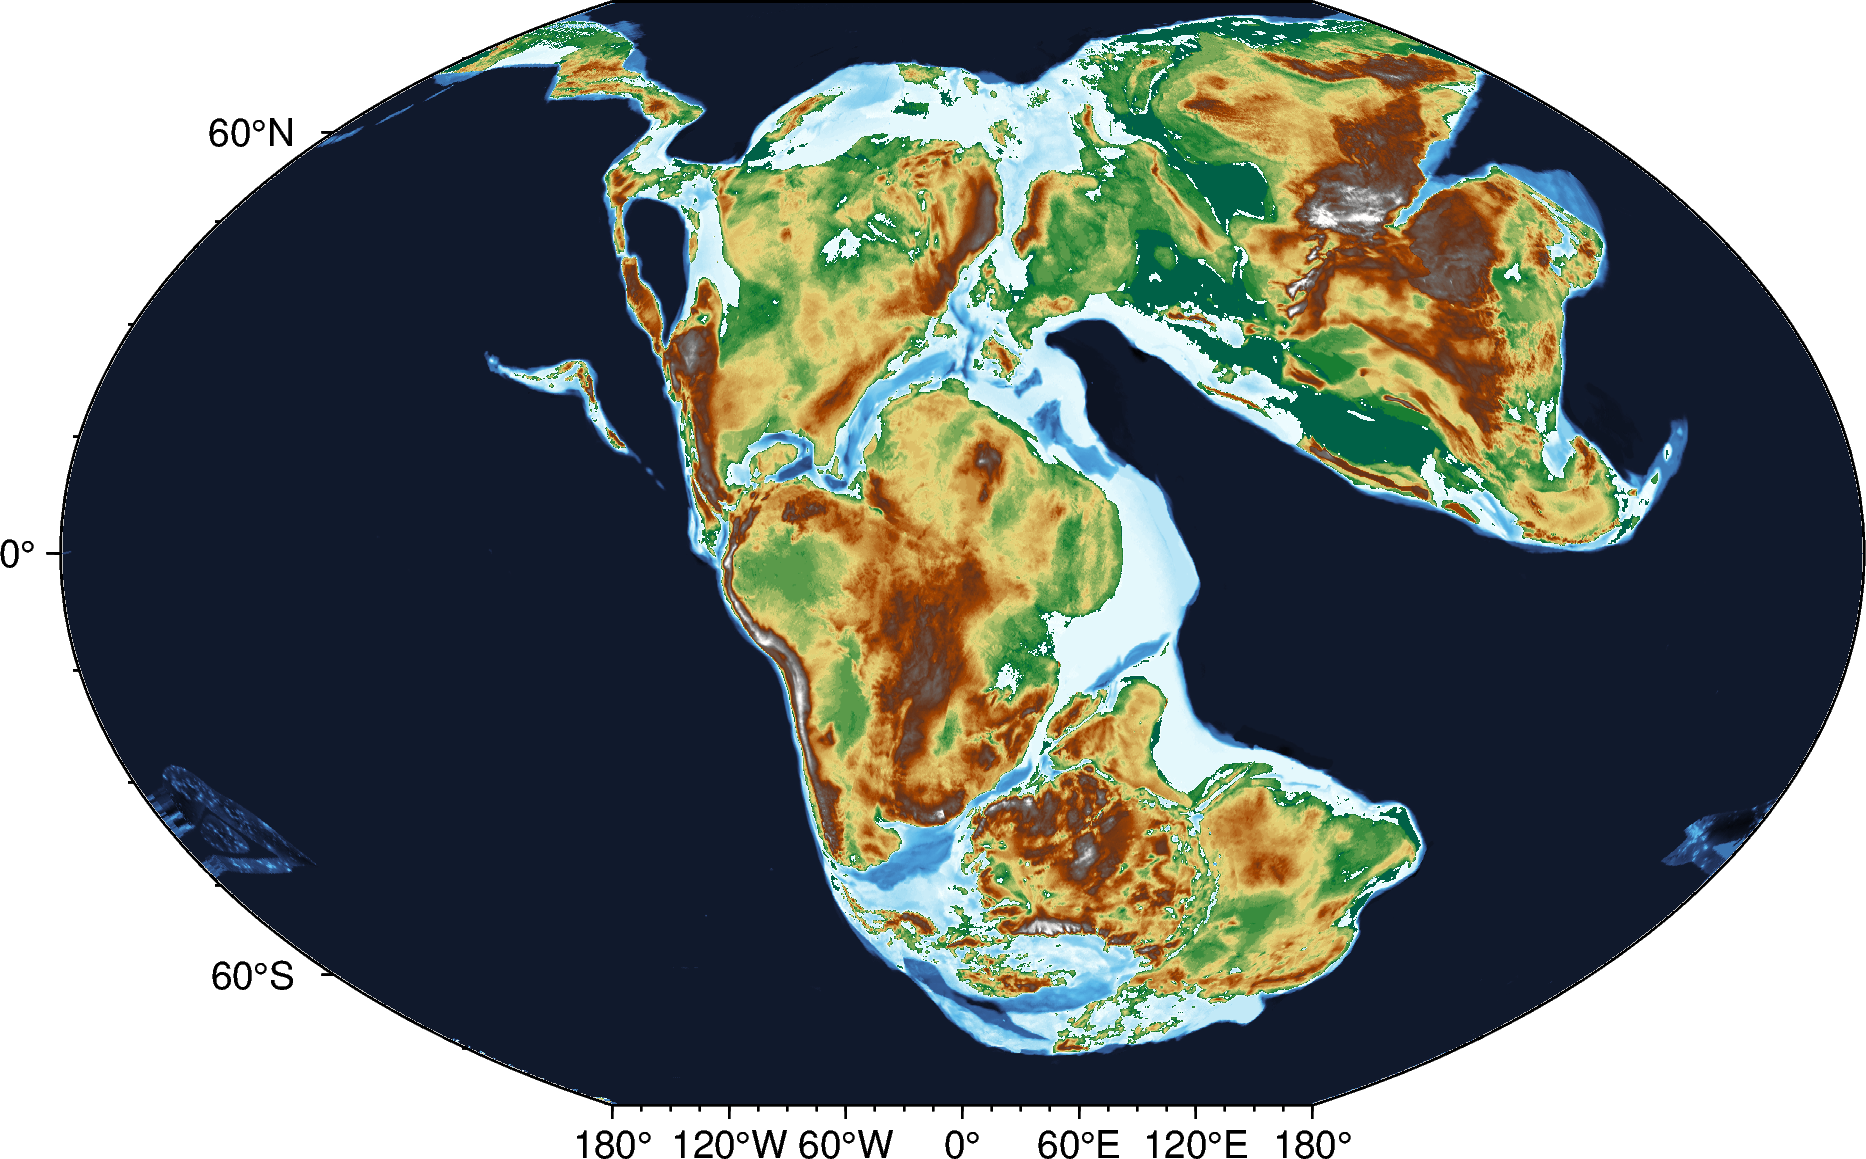

In [6]:
fig = pygmt.Figure()
fig.basemap(projection='R6i', region='d', frame='afg')
fig.grdimage(raster_list[reconstruction_time], cmap='geo')
fig.show()


grdinfo [WARNING]: Guessing of registration in conflict between x and y, using gridline


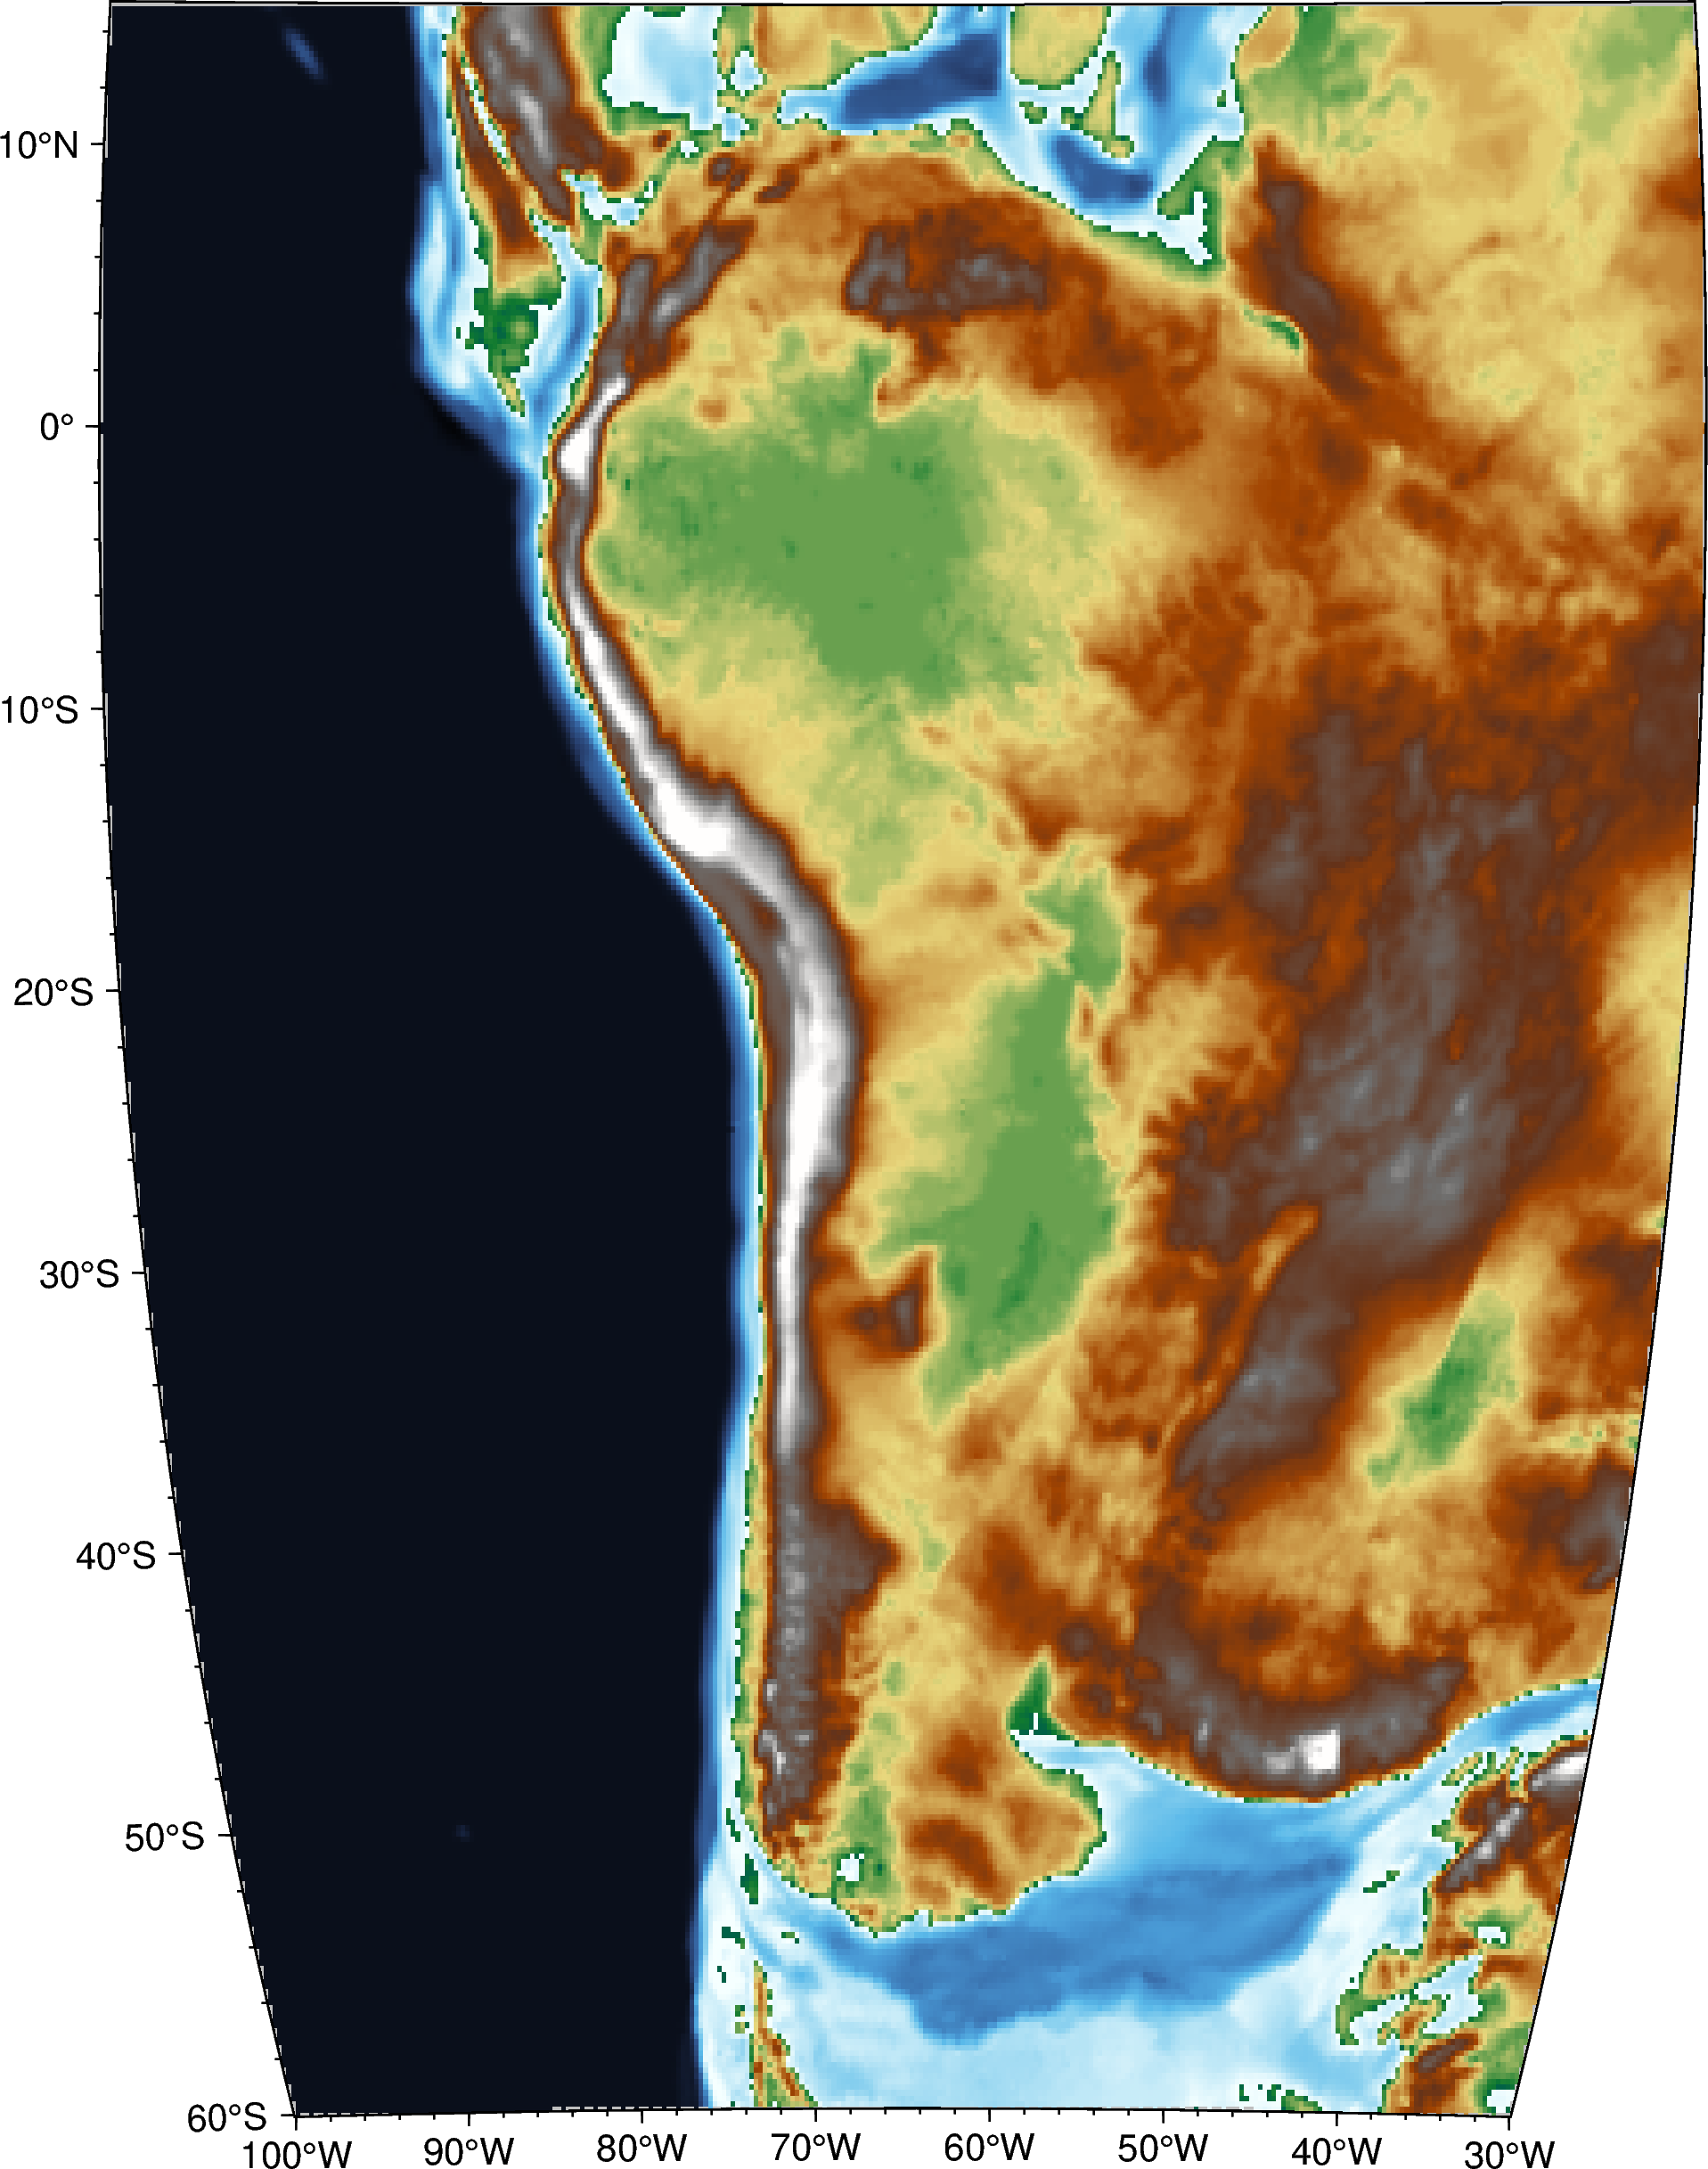

In [10]:
region = [-100,-30,-60,15]
rotated_grid = to_anchor_plate(raster_list[reconstruction_time], 
                               ScoteseModel, 
                               reconstruction_time, 
                               plate_id_to_rotate_to, 
                               region=region, spacing=0.2)

fig = pygmt.Figure()
fig.basemap(projection='R6i', region=region, frame='afg')
fig.grdimage(rotated_grid, cmap='geo')
fig.show()
